In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

In [2]:
#Cargamos el archivo airbnb.csv
data= pd.read_csv('airbnb.csv', encoding='ISO-8859-1')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,NaN,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,NaN,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,NaN,NaN,1.0,354.0,0.0


*****3. Aplicar los siguientes métodos para reemplazar valores nulos en cada columna:*****

In [3]:
#Identificamos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             7
neighbourhood_group               21669
neighbourhood                         6
latitude                              4
longitude                             2
room_type                             9
price                                 1
minimum_nights                        1
number_of_reviews                     4
last_review                        3990
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [4]:
#“host_name”: Rellenar con el objeto "anterior" de la columna
data["host_name"] =data["host_name"].fillna(method="bfill") 
data

#“neighbourhood”: Rellenar con el objeto "posterior" de la columna
data["neighbourhood"] =data["neighbourhood"].fillna(method="ffill") 
data

#“latitude ”: Rellenar con el valor de “Media” de la columna
mean_latitude=data['latitude'].mean() 
data['latitude'].fillna(value=mean_latitude, inplace=True) 

#“longitude”: Rellenar con el valor de “Mediana” de la columna
mean_longitude=data['longitude'].median() 
data['longitude'].fillna(value=mean_longitude, inplace=True) 

#“room_type”: Rellenar con el string “Private room”
data["room_type"] =data["room_type"].fillna("Private_room") 
data

#“price”: Rellenar con el valor de “Media” de la columna
mean_price=data['price'].mean() 
data['price'].fillna(value=mean_price, inplace=True) 

#“minimum_nights”: Rellenar con el valor de “1”
data["minimum_nights"] =data["minimum_nights"].fillna(1) 
data

#"number_of_reviews": Rellenar con el valor de “0”
data["number_of_reviews"] =data["number_of_reviews"].fillna(0) 
data

#"last_review":Rellenar con el objeto "31/12/2022" de la columna
data["last_review"] =data["last_review"].fillna("31/12/2022") 
data

#"reviews_per_month": Rellenar con el valor de “Media” de la columna
mean_reviews_per_month=data['reviews_per_month'].mean() 
data['reviews_per_month'].fillna(value=mean_reviews_per_month, inplace=True) 

#"calculated_host_listings_count": Rellenar con el valor de “1”
data["calculated_host_listings_count"] =data["calculated_host_listings_count"].fillna(1) 
data

#"availability_365" y "number of reviews ltm": Rellenar con el objeto "anterior" de cada columna respectivamente.
data["availability_365"] =data["availability_365"].fillna(method="bfill") 
data

data["number_of_reviews_ltm"] =data["number_of_reviews_ltm"].fillna(method="bfill") 
data

#Se elimina la columna "neighbourhood_group " ya que no existe ningún valor para los 21669 datos
data=data.drop(['neighbourhood_group'],axis=1)

#Se rellena la comuna "name" con el texto "Hermoso depa en Cancún"
data["name"] =data["name"].fillna("Hermoso depa en Cancún") 
data


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.170000,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/2022,1.586033,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/2022,1.586033,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.150000,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.430000,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.730000,79.0,314.0,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.970000,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.160000,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,31/12/2022,1.586033,1.0,354.0,0.0


In [7]:
#Vemos que ya no tenemps valores nulos en nuestro dataframe
valores_nulos=data.isnull().sum().sum()
valores_nulos

0

*****4 y 5.-Aplicar método de distribución normal y desviación Estandar*****

In [8]:
#Variable latitude

y=data["latitude"]
Limite_Superior= y.mean() + 2*y.std()
Limite_Inferior= y.mean() - 2*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers_latitude= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_latitude

Limite superior permitido 21.153344486744903
Limite inferior permitido 17.666679781844987


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12741,46757982.0,Residencia Master Suite con Terraza,375169008,Residencias,Benito JuÃ¡rez,99.39291,-99.17623,Entire home/apt,3678.0,2.0,0.0,31/12/2022,1.586033,25.0,337.0,0.0
21665,22107097.0,GREAT & cozy flat in Satelite,387195495,Daniela,Azcapotzalco,119.50787,-99.22067,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.970000,11.0,314.0,17.0


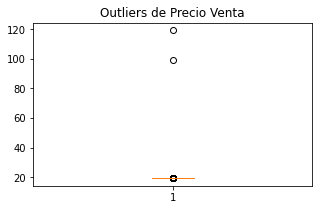

In [9]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["latitude"]) 
plt.title("Outliers de Precio Venta")
plt.show() #dibujamos el diagrama

In [ ]:
#Variable longitude

y=data["longitude"]
Limite_Superior= y.mean() + 2*y.std()
Limite_Inferior= y.mean() - 2*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers_latitude= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_latitude

In [ ]:
#“latitude”
#“longitude"
#"minimum_nights"
#"price"
#"number_of_reviews"
#"reviews_per_month"
#"availability_365"